In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
import scipy
import string
import pickle
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder            
from sklearn.svm import LinearSVC             
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier          
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

from astropy.table import Table, Column
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [2]:
import folium
import matplotlib.pyplot as plt
import seaborn as sns
import chardet

In [3]:

df=pd.read_csv(r"C:\\Users\zarnab shahid\Downloads\CMAPS_newData4.csv")
print("------------------------------------------------------")
print("------------------------------------------------------")
df.index.Rating = ['index']
df.head()

------------------------------------------------------
------------------------------------------------------


,Posting,Date,Month,Year,Days,Time,Offences,Offence Categories,Part of the Day,Latitudes,Longitudes,TGAT
0,Allama Iqbal Town,26,1,2018,Friday,0:00,Outraging the Modesty of Women,Crime Against Person,1st,31.5124,74.2845,"31.5124,74.2845"
1,Allama Iqbal Town,21,3,2018,Wednesday,0:00,Other Crime,Others,1st,31.5124,74.2845,"31.5124,74.2845"
2,Allama Iqbal Town,30,3,2018,Friday,0:00,Other Crime,Others,1st,31.5124,74.2845,"31.5124,74.2845"
3,Allama Iqbal Town,26,4,2018,Thursday,0:00,punjab arms ordinance bill of 2015,Ordinance,1st,31.5124,74.2845,"31.5124,74.2845"
4,Allama Iqbal Town,3,5,2018,Thursday,0:00,Other Crime,Others,1st,31.5124,74.2845,"31.5124,74.2845"


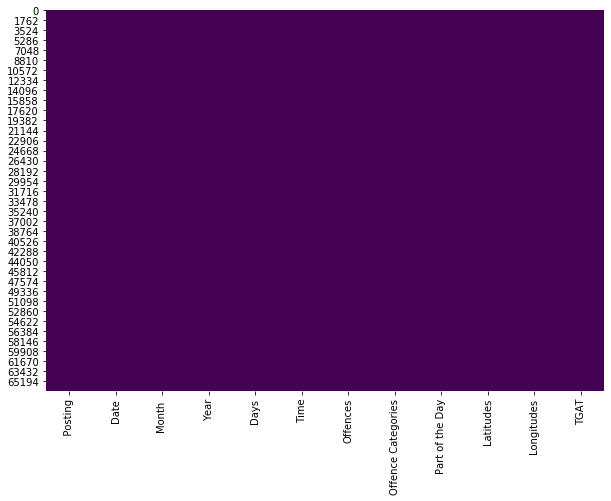

In [4]:
plt.figure(figsize=(10,7))
sns.heatmap(df.isnull(), cbar = False, cmap = 'viridis')

In [5]:
df = df.dropna()

In [6]:
df.count()

   Posting            66918
Date                  66918
Month                 66918
Year                  66918
Days                  66918
Time                  66918
Offences              66918
Offence Categories    66918
Part of the Day       66918
Latitudes             66918
Longitudes            66918
TGAT                  66918
dtype: int64

In [7]:
x = pd.value_counts(df['   Posting'])[:1]
print("Area with highest number crimes is", x)

Area with highest number crimes is Cantt    6575
Name:    Posting, dtype: int64


In [8]:
pd.value_counts(df['   Posting'])

Cantt                6575
Chung                4489
Green Town           4436
Raiwind              3543
Sabzazar             3409
Allama Iqbal Town    3237
Mughal Pura          3227
Shad Bagh            2694
Shahdra Town         2632
Ichra                2554
Johar Town           2505
Faisal Town          2413
Defence A            2373
Anarkali             2298
Gulshan Ravi         2297
Gulberg              1982
Ravi Road            1946
Gardan Town          1917
Muslim Town          1740
Lyton Road           1657
Mozang               1642
Saman Abad           1582
Race Course          1287
barki road           1190
Shadman              1137
Hadyara              1034
Model Town            810
Sarwar Road           310
barki road              2
Name:    Posting, dtype: int64

In [9]:
pd.value_counts(df['Offences'])

Other Crime                                                              16813
Miscellaneous                                                             9712
M/Cycle Theft                                                             4577
anti-norcotics act                                                        4293
punjab arms ordinance bill of 2015                                        3092
electricity act                                                           2875
Robbery                                                                   2605
Burglary                                                                  2159
Kidnapping                                                                2107
Cheque Dishonour                                                          2003
Narcotics                                                                 1954
Overspeeding                                                              1936
price control act                                   

In [10]:
cat_val= pd.value_counts(df['Offence Categories'])
cat_val

Others                    36523
Crime Against Property    10343
Crime Against Person       6433
Ordinance                  5650
Police Acts                4327
Social Evils               2786
Acts                        660
Religious Offerings         191
Act                           3
Regulations                   2
Name: Offence Categories, dtype: int64

In [11]:
from matplotlib import cm

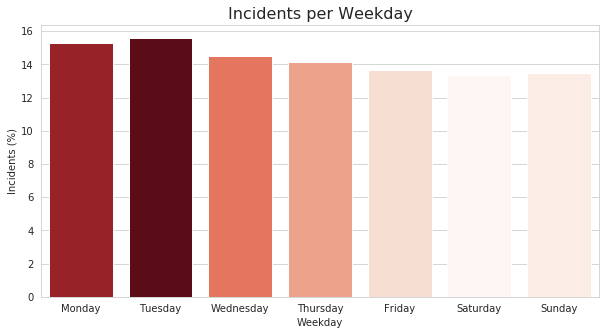

In [13]:
data = df.groupby('Days').count().iloc[:, 0]
data = data.reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
    'Sunday'
])

plt.figure(figsize=(10, 5))
with sns.axes_style("whitegrid"):
    ax = sns.barplot(
        data.index, (data.values / data.values.sum()) * 100,
        orient='v',
        palette=cm.ScalarMappable(cmap='Reds').to_rgba(data.values))

plt.title('Incidents per Weekday', fontdict={'fontsize': 16})
plt.xlabel('Weekday')
plt.ylabel('Incidents (%)')

plt.show()

In [14]:
x = pd.value_counts(df['Days'])[:1]
print("According to this graph the day on which the highest number crimes took place is", x)

According to this graph the day on which the highest number crimes took place is Tuesday    10432
Name: Days, dtype: int64


<Figure size 1080x720 with 0 Axes>

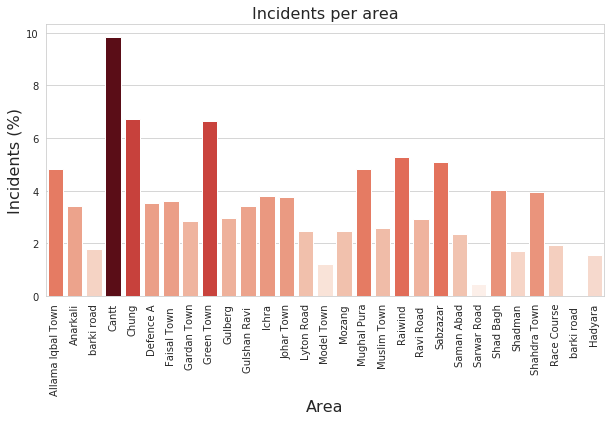

In [15]:
plt.figure(figsize = (15, 10))
data = df.groupby('   Posting').count().iloc[:, 0]
data = data.reindex([
    'Allama Iqbal Town', 'Anarkali', 'barki road', 'Cantt', 'Chung',
       'Defence A', 'Faisal Town ', 'Gardan Town', 'Green Town',
       'Gulberg', 'Gulshan Ravi ', 'Ichra', 'Johar Town', 'Lyton Road',
       'Model Town', 'Mozang', 'Mughal Pura', 'Muslim Town', 'Raiwind',
       'Ravi Road ', 'Sabzazar', 'Saman Abad', 'Sarwar Road', 'Shad Bagh',
       'Shadman', 'Shahdra Town', 'Race Course', 'barki road ', 'Hadyara'
])

plt.figure(figsize=(10, 5))
with sns.axes_style("whitegrid"):
    ax = sns.barplot(
        data.index, (data.values / data.values.sum()) * 100,
        orient='v',
        palette=cm.ScalarMappable(cmap='Reds').to_rgba(data.values))

plt.title('Incidents per area', fontdict={'fontsize': 16})
plt.xlabel('Area', fontdict={'fontsize': 16})
plt.xticks(rotation=90)
#rotate x-axis labels by 90 degrees
plt.ylabel('Incidents (%)', fontdict={'fontsize': 16})

plt.show()

In [16]:
x = pd.value_counts(df['   Posting'])[:1]
print("According to this graph the area on which the highest number crimes took place is", x)

According to this graph the area on which the highest number crimes took place is Cantt    6575
Name:    Posting, dtype: int64


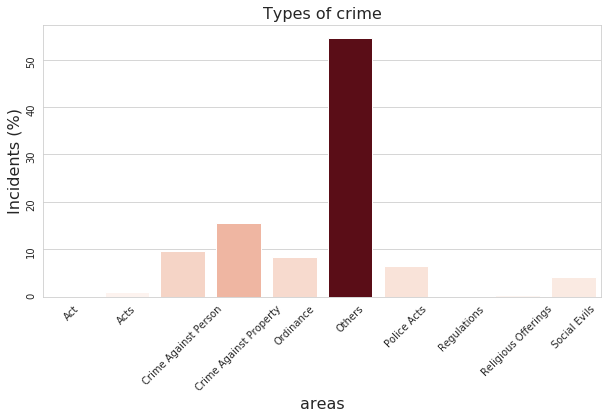

In [17]:
data = df.groupby('Offence Categories').count().iloc[:, 0]


plt.figure(figsize=(10, 5))
with sns.axes_style("whitegrid"):
    ax = sns.barplot(
        data.index, (data.values / data.values.sum()) * 100,
        orient='v',
        palette=cm.ScalarMappable(cmap='Reds').to_rgba(data.values))

plt.title('Types of crime', fontdict={'fontsize': 16})
plt.xlabel('areas' , fontdict={'fontsize': 16})
plt.xticks(rotation=45)
#rotate x-axis labels by 45 degrees

plt.yticks(rotation=90)
plt.ylabel('Incidents (%)', fontdict={'fontsize': 16})

plt.show()

In [18]:
x = pd.value_counts(df['Offence Categories'])[1:2]
print("According to this graph the area on which the highest number crimes took place is", x)

According to this graph the area on which the highest number crimes took place is Crime Against Property    10343
Name: Offence Categories, dtype: int64


Text(0.5, 0, 'Number of Incidents ')

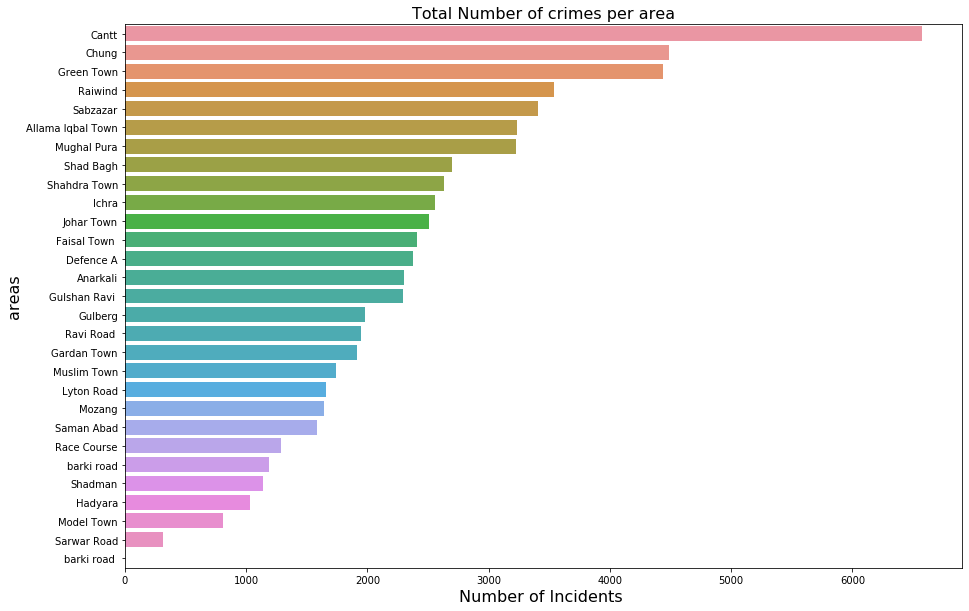

In [19]:
plt.figure(figsize = (15,10))
plt.title('Total Number of crimes per area', fontdict={'fontsize': 16})
sns.countplot(y= '   Posting', data = df, order = df['   Posting'].value_counts().index)
plt.ylabel('areas' , fontdict={'fontsize': 16})
plt.xlabel('Number of Incidents ', fontdict={'fontsize': 16})

Text(0.5, 0, 'Number of Incidents ')

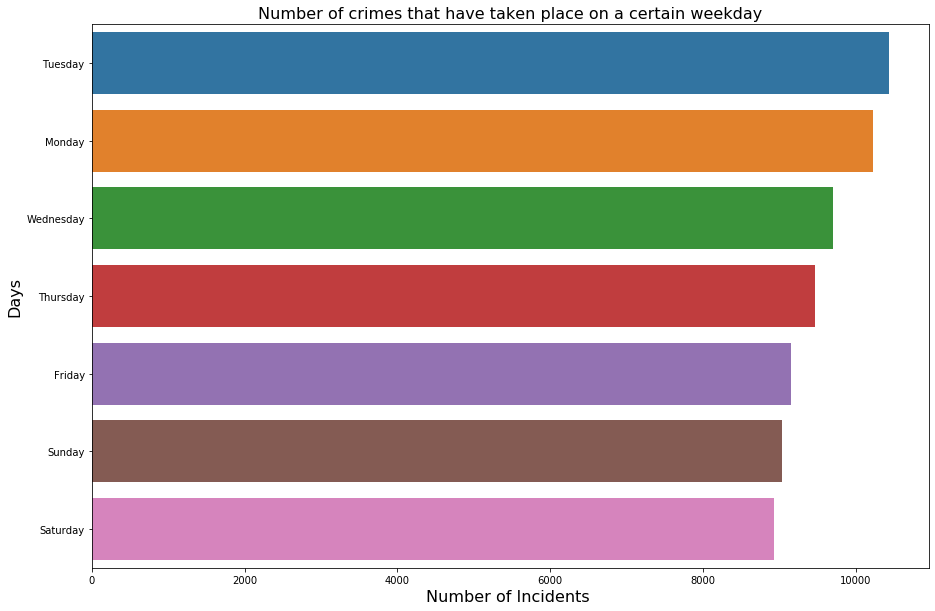

In [20]:
plt.figure(figsize = (15, 10))
sns.countplot(y='Days', data = df, order = df['Days'].value_counts().index)
plt.title('Number of crimes that have taken place on a certain weekday', fontdict={'fontsize' :16})
plt.ylabel('Days' , fontdict={'fontsize': 16})
plt.xlabel('Number of Incidents ', fontdict={'fontsize': 16})


Text(0.5, 0, 'Number of Incidents ')

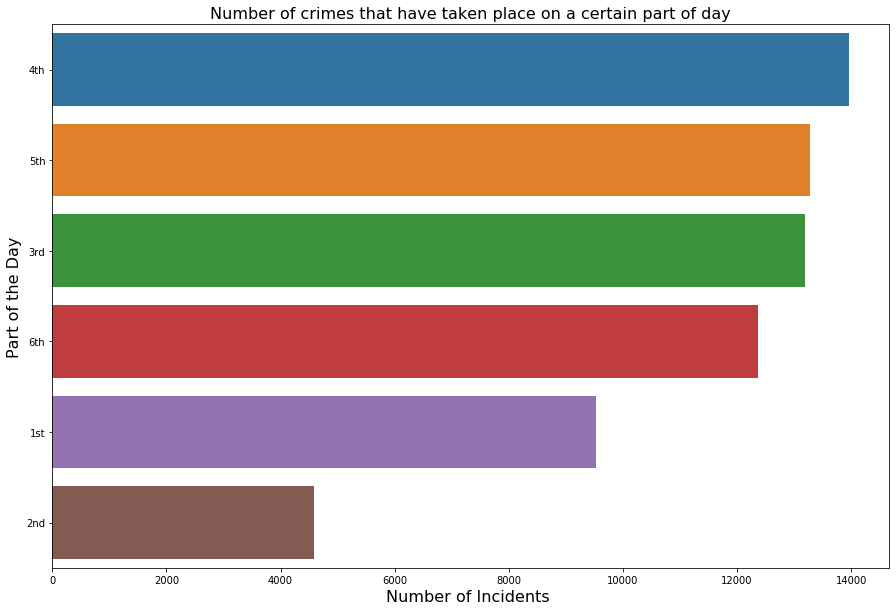

In [21]:
plt.figure(figsize = (15, 10))
sns.countplot(y='Part of the Day', data = df, order = df['Part of the Day'].value_counts().index)
plt.title('Number of crimes that have taken place on a certain part of day', fontdict={'fontsize' :16})
plt.ylabel('Part of the Day' , fontdict={'fontsize': 16})
plt.xlabel('Number of Incidents ', fontdict={'fontsize': 16})


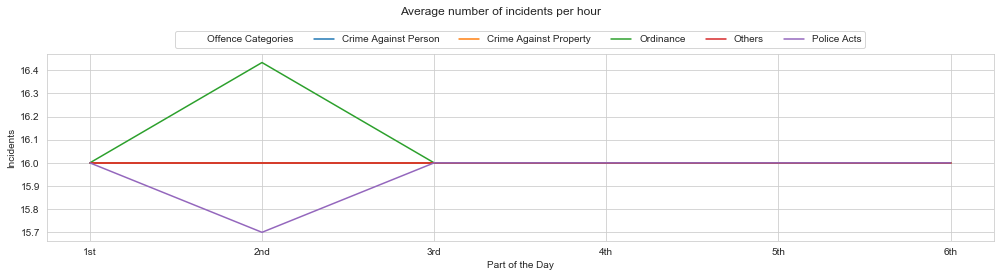

In [22]:
data = df.groupby(['Part of the Day', 'Date', 'Offence Categories'],
                     as_index=False).count().iloc[:, :4]
data.rename(columns={'Date': 'Incidents'}, inplace=True)
data = data.groupby(['Part of the Day', 'Offence Categories'], as_index=False).mean()
data = data.loc[data['Offence Categories'].isin(
    ['Others', 'Crime Against Property', 'Crime Against Person', 'Ordinance', 'Police Acts'])]

sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(14, 4))
ax = sns.lineplot(x='Part of the Day', y='Incidents', data=data, hue='Offence Categories')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=6)
plt.suptitle('Average number of incidents per hour')
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [23]:
from matplotlib import cm

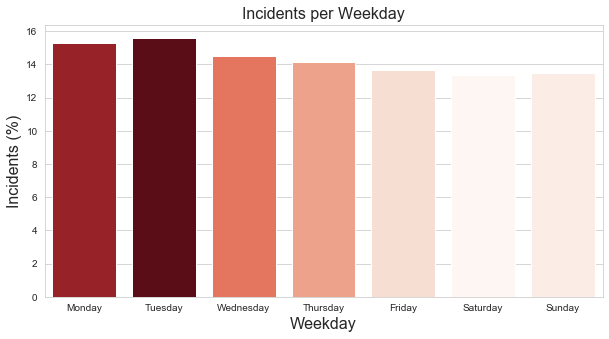

In [24]:
data = df.groupby('Days').count().iloc[:, 0]
data = data.reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
    'Sunday'
])

plt.figure(figsize=(10, 5))
with sns.axes_style("whitegrid"):
    ax = sns.barplot(
        data.index, (data.values / data.values.sum()) * 100,
        orient='v',
        palette=cm.ScalarMappable(cmap='Reds').to_rgba(data.values))

plt.title('Incidents per Weekday', fontdict={'fontsize': 16})
plt.xlabel('Weekday',fontdict={'fontsize': 16})
plt.ylabel('Incidents (%)', fontdict={'fontsize': 16})
plt.savefig('Incidents per Weekday.png')
plt.savefig('Incidents per Weekday.pdf')
plt.show()

Text(0, 0.5, 'Total Number of Incidents')

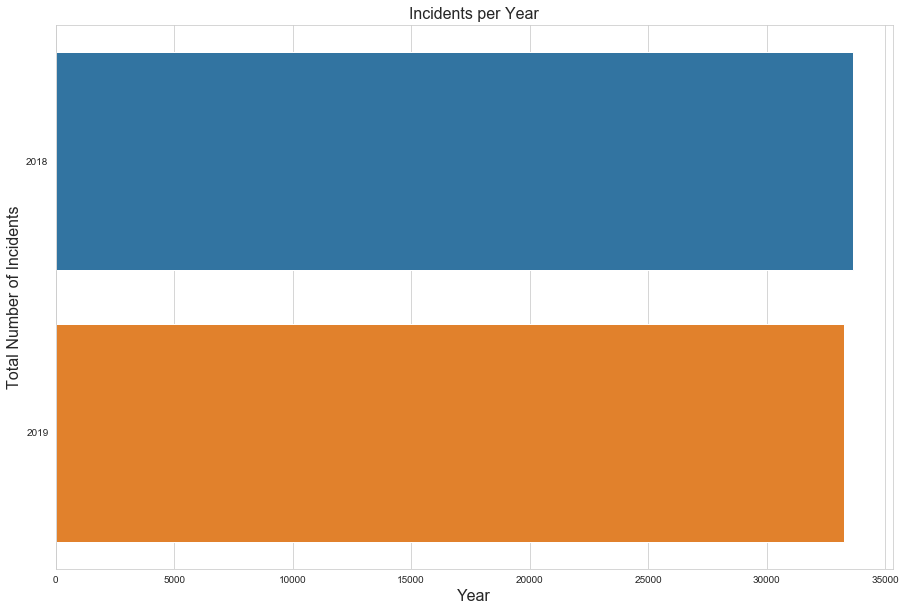

In [25]:
plt.figure(figsize = (15, 10))
sns.countplot(y= 'Year', data = df, order = df['Year'].value_counts().index)
plt.title('Incidents per Year', fontdict={'fontsize': 16})
plt.xlabel('Year',fontdict={'fontsize': 16})
plt.ylabel('Total Number of Incidents', fontdict={'fontsize': 16})


In [26]:
year_count = df.groupby('Year')
year_count = year_count['Offence Categories'].count()
year_count = year_count.reset_index()
year_count.head()

,Year,Offence Categories
0,2018,33637
1,2019,33281


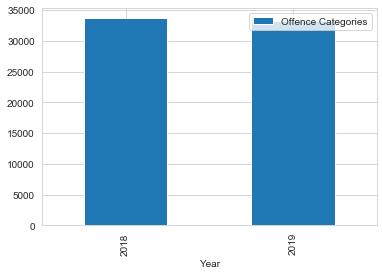

In [27]:
year_plot = pd.DataFrame(year_count,columns=['Year','Offence Categories'])
year_plot.plot(x ='Year', y='Offence Categories', kind = 'bar')
plt.show()


In [28]:
M_Cycle_Theft = df[df.Offences.str.contains("M/Cycle Theft")]
M_Cycle_Theft.head()

,Posting,Date,Month,Year,Days,Time,Offences,Offence Categories,Part of the Day,Latitudes,Longitudes,TGAT
8,Allama Iqbal Town,18,6,2018,Monday,0:00,M/Cycle Theft,Crime Against Property,1st,31.5124,74.2845,"31.5124,74.2845"
15,Allama Iqbal Town,20,9,2018,Thursday,0:00,M/Cycle Theft,Crime Against Property,1st,31.5124,74.2845,"31.5124,74.2845"
24,Anarkali,13,8,2018,Monday,0:00,M/Cycle Theft,Crime Against Property,1st,31.5698,74.3120,"31.5698,74.312"
29,Anarkali,11,4,2018,Wednesday,0:00,M/Cycle Theft,Crime Against Property,1st,31.5698,74.3120,"31.5698,74.312"
44,Cantt,18,4,2018,Wednesday,0:00,M/Cycle Theft,Crime Against Property,1st,31.5196,74.3889,"31.5196,74.3889"


Text(0.5, 0, 'Area')

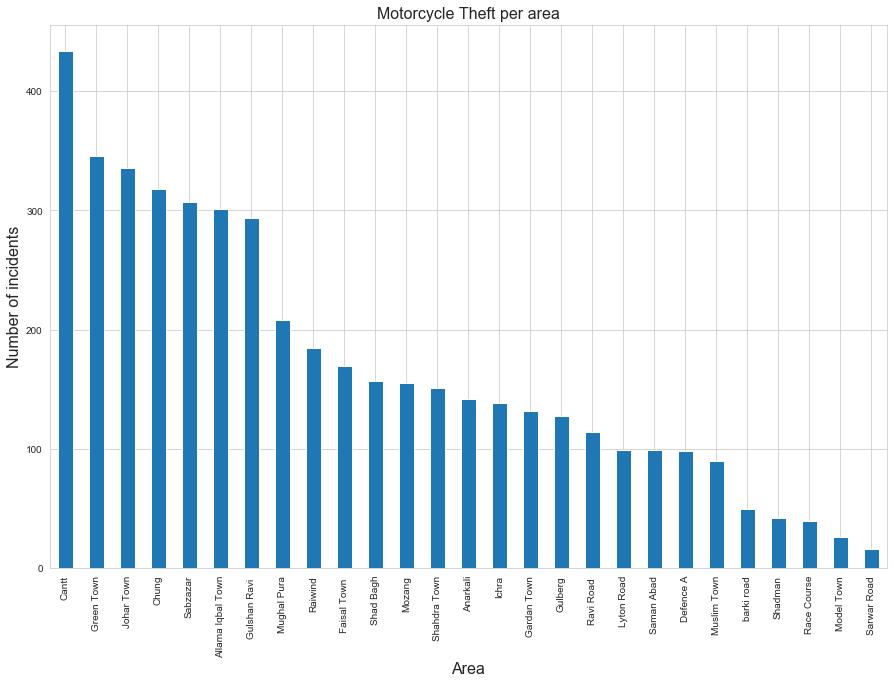

In [29]:
plt.figure(figsize = (15, 10))
plt.title('Motorcycle Theft per area', fontdict={'fontsize': 16})
M_Cycle_Theft.groupby( '   Posting').size().sort_values(ascending = False).plot(kind= 'bar')
plt.ylabel('Number of incidents', fontdict={'fontsize': 16})
plt.xlabel('Area', fontdict={'fontsize': 16})

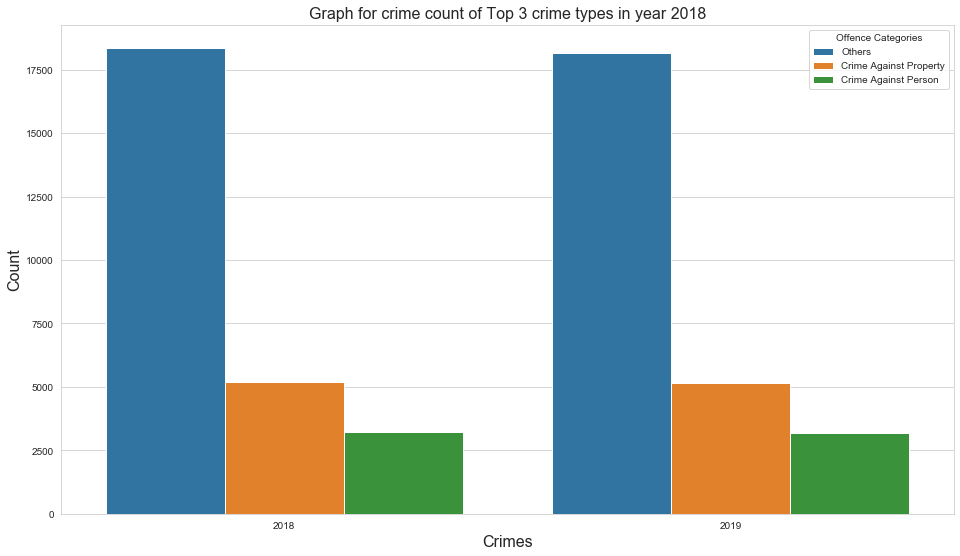

In [36]:
data_offense_desc_groupby=df.groupby('Offence Categories').size().reset_index()
# offense description groupby
data_offense_desc_groupby.columns=['Offence Categories', 'count']

data_offense_desc_monthly_groupby=df.groupby(['Month ', 'Offence Categories']).size().reset_index()

#  set column names
data_offense_desc_monthly_groupby.columns=['Month ', 'Offence Categories', 'count']

data_offense_desc_yearly_groupby=df.groupby(['Year', 'Offence Categories']).size().reset_index()

#  set column names
data_offense_desc_yearly_groupby.columns=['Year', 'Offence Categories', 'count']

# sort by count
data_offense_desc_yearly_groupby=data_offense_desc_yearly_groupby.sort_values('count',ascending=False)

# YEARLY TOP 3 CRIMES in each YEAR
data_offense_desc_yearly_top=data_offense_desc_yearly_groupby.groupby(['Year']).head(3).sort_values('Year')

# sort by count
data_offense_desc_monthly_groupby=data_offense_desc_monthly_groupby.sort_values('count',ascending=False)

# YEARLY TOP 3 CRIMES in each month
data_offense_desc_monthly_top=data_offense_desc_monthly_groupby.groupby(['Month ']).head(3).sort_values('Month ')
data_offense_desc_monthly_top

# plot top crimes over the years
plt.figure(figsize=(16, 9))
chart=sns.barplot(x='Year',y='count',hue='Offence Categories',data=data_offense_desc_yearly_top)
plt.title('Graph for crime count of Top 3 crime types in year 2018', fontdict={'fontsize': 16})
plt.xlabel("Crimes" , fontdict={'fontsize' :16})
plt.ylabel("Count" , fontdict={'fontsize' :16})
plt.savefig('Graph for Top 3 crime types in year 2018.png', bbox_inches='tight')

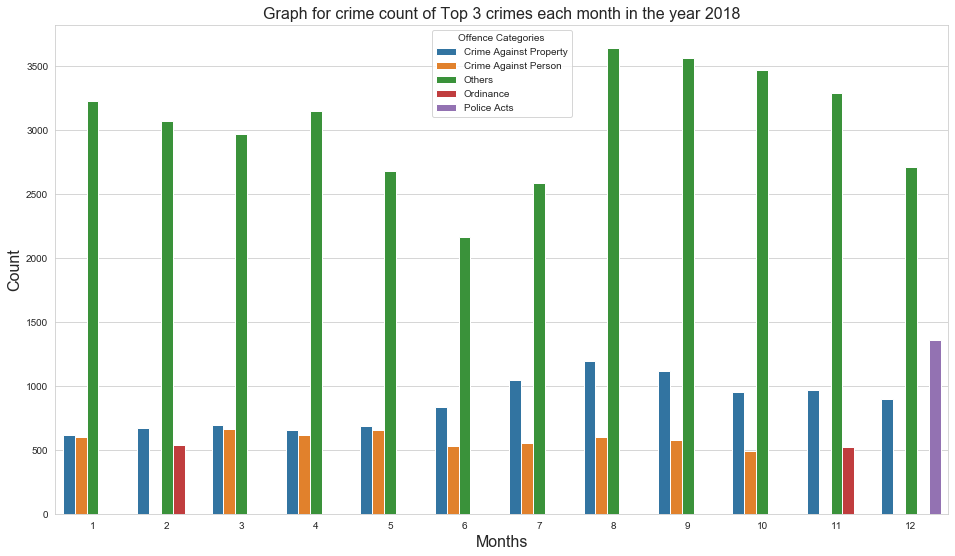

In [34]:
# plot top crimes over the months
plt.figure(figsize=(16, 9))
chart=sns.barplot(x='Month ',y='count',hue='Offence Categories',data=data_offense_desc_monthly_top)
plt.title('Graph for crime count of Top 3 crimes each month in the year 2018', fontdict={'fontsize': 16})
plt.xlabel("Months" , fontdict={'fontsize' :16})
plt.ylabel("Count" , fontdict={'fontsize' :16})
plt.savefig('Graph for crime count of Top 3 crimes each month in the year 2018.png', bbox_inches='tight')

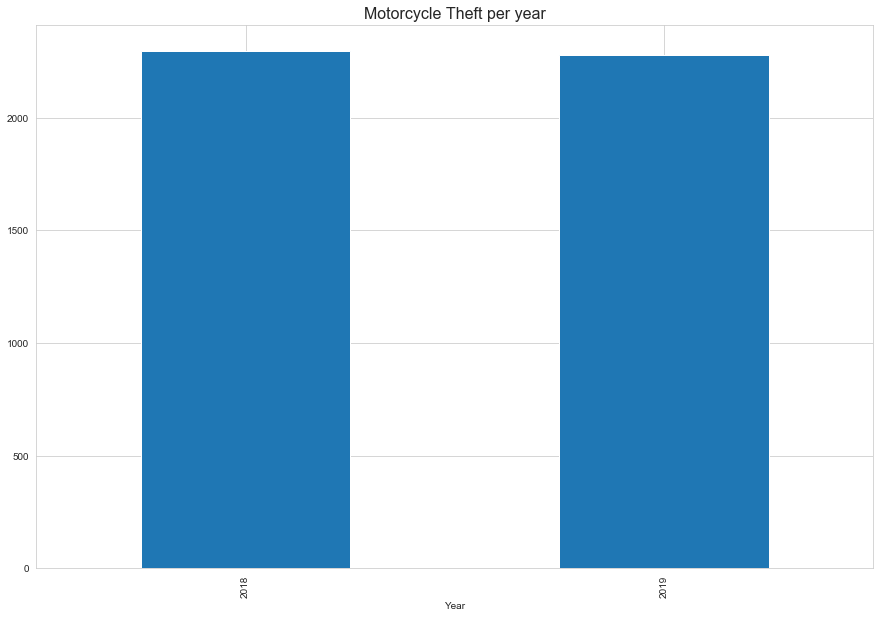

In [188]:
plt.figure(figsize = (15, 10))
plt.title('Motorcycle Theft per year', fontdict={'fontsize': 16})
M_Cycle_Theft.groupby('Year').size().sort_values(ascending = False).plot(kind= 'bar')

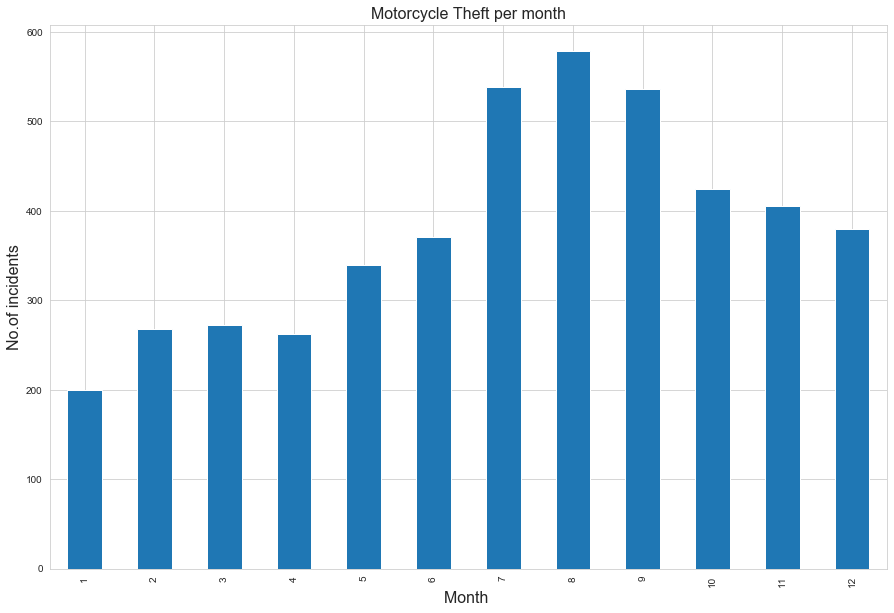

In [189]:
plt.figure(figsize = (15, 10))
plt.title('Motorcycle Theft per month', fontdict={'fontsize': 16})
plt.xlabel('Months', fontdict={'fontsize': 16})
plt.ylabel('No.of incidents', fontdict={'fontsize': 16})
plt.xticks(rotation=45)
#rotate x-axis labels by 45 degrees

M_Cycle_Theft.groupby('Month ').size().plot(kind= 'bar')

In [190]:
df.columns

Index(['   Posting', 'Date', 'Month ', 'Year', 'Days', 'Time', 'Offences',
       'Offence Categories', 'Part of the Day', 'Latitudes', 'Longitudes',
       'TGAT'],
      dtype='object')

In [191]:
lahore_map = folium.Map(location=[31.5204,74.35874],
                        zoom_start=11,
                        tiles="CartoDB dark_matter")

In [192]:
y = input("enter year")
print("Displaying crime map for the year", y)

enter year2018
Displaying crime map for the year 2018


In [193]:
locations1 = df.loc[df['Year'].isin([y])] 

In [194]:
locationsfor1 = locations1.groupby('   Posting').first()


In [195]:
new_locations1 = locationsfor1.loc[:, ['Latitudes', 'Longitudes']]

In [196]:
popup_text = "Posting : {}<br>"

In [197]:
for i in range(len(new_locations1)):
    lat = new_locations1.iloc[i][0]
    long = new_locations1.iloc[i][1]
    popup_text = "Posting : {}<br>"
    popup_text = popup_text.format(new_locations1.index[i],
                               new_locations1.iloc[i][-1],
                               new_locations1.iloc[i][-2]
                               )
    folium.CircleMarker(location = [lat, long], popup= popup_text, fill = True).add_to(lahore_map)

In [198]:
unique_locations1 = locations1['TGAT'].value_counts()

In [199]:
unique_locations1.index

Index(['31.5196,74.3889', '31.422,74.1739', '31.4346,74.3074',
       '31.2449,74.2137', '31.5209,74.2701', '31.5124,74.2845',
       '31.569,74.3586', '31.6001,74.3397', '31.6211,74.2824',
       '31.5313,74.3183', '31.4621,74.2942', '31.476,74.3045',
       '31.4699,74.4388', '31.5698,74.312', '31.5521,74.2795',
       '31.5102,74.3441', '31.5946,74.302', '31.5155,74.3191',
       '31.5194,74.3228', '31.5538,74.3115', '31.5597,74.3138',
       '31.5356,74.2985', '31.539,74.3357', '31.4789,74.5087',
       '31.5378,74.3309', '31.545,74.3406', '31.4805,74.3239',
       '31.5467,74.3773'],
      dtype='object')

In [200]:
#A simple Criminal Rate Index DataFrame

In [201]:
CR_index1 = pd.DataFrame({"Raw_String" : unique_locations1.index, "ValueCount":unique_locations1})
CR_index1.index = range(len(unique_locations1))


In [202]:
def Location_extractor(Raw_Str):
    preProcess = Raw_Str.split(',')
    lat =  float(preProcess[0])
    long = float(preProcess[1])
    return (lat, long)

In [203]:
CR_index1['LocationCoord'] = CR_index1['Raw_String'].apply(Location_extractor)

In [204]:
CR_index1  = CR_index1.drop(columns=['Raw_String'], axis = 1)

In [205]:
Postings = locations1['   Posting'].value_counts()
area = pd.DataFrame({"Area" : Postings.index, "ValueCount":Postings})


In [208]:
Crime_type18 = locations1.groupby('   Posting')
Crime_type18 = locations1.groupby('   Posting')
Crime_type18= locations1['Offences'].value_counts()
Crime_type18 = pd.DataFrame({"Type" : Crime_type18.index, "ValueCount":Crime_type18})
Crime_type18.head()

,Type,ValueCount
Other Crime,Other Crime,8445
Miscellaneous,Miscellaneous,4886
M/Cycle Theft,M/Cycle Theft,2297
anti-norcotics act,anti-norcotics act,2153
punjab arms ordinance bill of 2015,punjab arms ordinance bill of 2015,1555


In [209]:
 #Simple Lahore Mapping showing the total criminal rates.

In [210]:
%%time

lahore_map_crime = folium.Map(location=[31.5204,74.35874],
                        zoom_start=13,
                        )

for i in range(len(CR_index1)):
    lat = CR_index1['LocationCoord'].iloc[i][0]
    long = CR_index1['LocationCoord'].iloc[i][1]
    radius = CR_index1['ValueCount'].iloc[i] / 45
    
    if CR_index1['ValueCount'].iloc[i] > 1000:
        color = "#FF0000"
    elif CR_index1['ValueCount'].iloc[i] > 800:
         color = "#FF4500"
    elif CR_index1['ValueCount'].iloc[i] > 500:
         color = "#32CD32"
    elif CR_index1['ValueCount'].iloc[i] > 200:
         color = "#FFFF00"
    else:
        color = "#008080" 
    z=range(len(Crime_type18))
    
    popup_text ="""Area: {}<br>
                No. of Crime Incidents : {}<br>
                """
    popup_text = popup_text.format(area['Area'].iloc[i],
                               CR_index1['ValueCount'].iloc[i]
                               )
    folium.CircleMarker(location = [lat, long], popup= popup_text,radius = radius, color = color, fill = True).add_to(lahore_map_crime)


Wall time: 160 ms


In [211]:
lahore_map_crime